# SED PN emission lines of CTIO Data in January 2017
==================================================================================================

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS France
- date   : January 19th 2017
- update : January 25 2017

The goal is to calibrate in wavelength the X axis.
For this the raw spectra in the dat are read as well as the spectra simulated.
The simulated may have been checked by View_SimSpectrum_XX.ipynb

In [4]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [5]:
print theNotebook

SEDEmissionLines_HEN2_5


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
import re
import os

In [7]:
import ccdproc
print 'ccdproc version',ccdproc.__version__

from astropy.modeling import models

ccdproc version 1.0.1


In [8]:
from scipy import stats  
from scipy import ndimage
from datetime import datetime, timedelta
from mpl_toolkits.mplot3d import Axes3D
import scipy.signal

In [9]:
import bottleneck as bn  # numpy's masked median is slow...really slow (in version 1.8.1 and lower)
print 'bottleneck version',bn.__version__

bottleneck version 1.0.0


In [10]:
import photutils
from astropy.stats import sigma_clipped_stats
from photutils import daofind
from photutils import CircularAperture
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
#from photutils.background import Background2D
from photutils import Background2D, SigmaClip, MedianBackground

In [11]:
%load_ext Cython

In [12]:
from IPython.display import Image, display

In [13]:
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

In [14]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (4, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [15]:
############################################################################
def ensure_dir(f):
    d = os.path.dirname(f)
    if not os.path.exists(f):
        os.makedirs(f)
#########################################################################

In [16]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)  # Fast and numerically precise
    return (average, np.sqrt(variance))

### Calibration in wavelength

Image #507, focus=12000
Image #508, focus=12050
Image #509, focus=12100
Image #510, focus=12150 -> Manipulation error. Use the next and suppress this one.
Image #511, focus=12150
Image #512, focus=12200
Image #513, focus=12250 -> I see that the PSF of the PN is wider than stars; spectral lines are elongated in lambda.
Image #514, focus=12300 -> seeing monitor 1.4
Image #515, focus=12350 -> looks like "normal" focus for stars (seeing~1.4" like monitor)
Image #516, focus=12400
Image #517, focus=12450
Image #518, focus=12500
Image #519, focus=12550 -> airmass 1.66
Image #520, focus=12600 -> Le soleil arrive... Le fond monte
Image #521, focus=12650
Image #522, focus=12700
Image #523, focus=12750


In [17]:
X=[4102, 4340, 4363, 4388,4472, 4861, 4922, 4959, 5007, 5518,5538, 5754,5876, 6548, 6563,6584, 6678, 6716,6731,7065,7136,7325]
Y=[20.7, 39.6, 2.7, 0.3, 4.6, 100.,1.3, 193.9, 605.0, 0.3, 0.5,0.7,17.4,0.,650., 47.5,5.2,1.,1.9,8.9,13.3,11.]

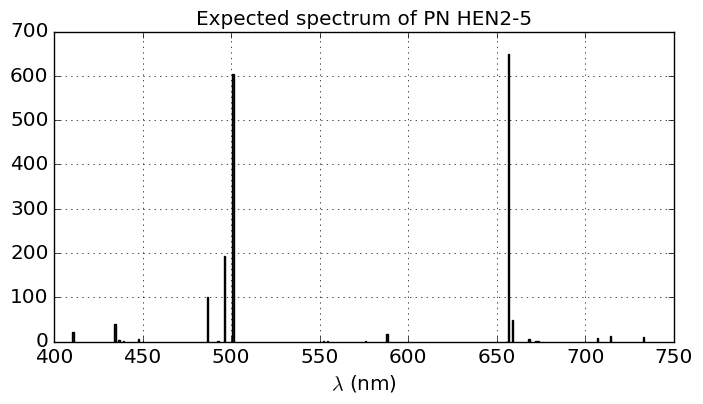

In [18]:
WL=np.array(X)/10.
plt.figure(figsize=(8,4))
plt.grid()
plt.bar(WL,Y,lw=1)
plt.xlabel('$\lambda$ (nm)')
plt.title('Expected spectrum of PN HEN2-5')